In [4]:
#f(x)=(1+x)**2
import numpy as np
import torch as t
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from d2l import torch as d2l
import torch.nn as nn
import time

In [ ]:
#import matplotlib   
#matplotlib.use('Agg')

In [19]:
def f(x):
    return (x+1)**2

def x_grad_function(x,r):
    return math.gamma(3)*(x+1)**(2-r)/math.gamma(3-r)

def x_grad_function_fabs(x,r):
    return math.gamma(3)*(np.fabs(x+1))**(2-r)/math.gamma(3-r)

In [129]:
range_size = 30

def vfosgd_pf(lr, xf):
    x = 10.0
    results = [x]
    for i in range(range_size):
        if x>=-1:
            x -= lr * xf(x,alpha)
            #print('is')
        else:
            x -= lr * xf(x,1)
            #print('no')
        results.append(float(x))
    print(f'epoch, x: {x:f}')
    return results

def gd(lr, xf):
    x = 10.0
    results = [x]
    for i in range(range_size):
        x -= lr * xf(x,1)
        #print('no')
        results.append(float(x))
    print(f'epoch, x: {x:f}')
    return results

In [148]:
lr = 0.3     #learning rate
alpha = 1.2   #fractional order
timestart = time.time()
resultf1_2 = vfosgd_pf(lr, x_grad_function)
#esultf1_2 = ifosgd_pf(lr, x_grad_function,x_grad_function_fabs)
timeend = time.time()
print('time:',timeend-timestart)
print(resultf1_2)

alpha = 1.4   #fractional order
resultf1_4 = vfosgd_pf(lr, x_grad_function)

alpha = 1.0   #fractional order
resultf1_0 = vfosgd_pf(lr, x_grad_function)

alpha = 0.8   #fractional order
resultf0_8 = vfosgd_pf(lr, x_grad_function)

epoch, x: -1.000000
time: 0.0
[10.0, 5.613312144988996, 2.693480564830026, 0.8612874844252976, -0.19765738323069537, -0.737802522906302, -0.958565067344549, -1.0090214247144869, -1.0036085698857948, -1.0014434279543178, -1.0005773711817272, -1.0002309484726908, -1.0000923793890764, -1.0000369517556305, -1.0000147807022521, -1.0000059122809009, -1.0000023649123604, -1.0000009459649442, -1.0000003783859777, -1.000000151354391, -1.0000000605417565, -1.0000000242167026, -1.000000009686681, -1.0000000038746724, -1.000000001549869, -1.0000000006199476, -1.000000000247979, -1.0000000000991915, -1.0000000000396767, -1.0000000000158706, -1.0000000000063483]
epoch, x: -1.000000
epoch, x: -1.000000
epoch, x: -0.999552


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


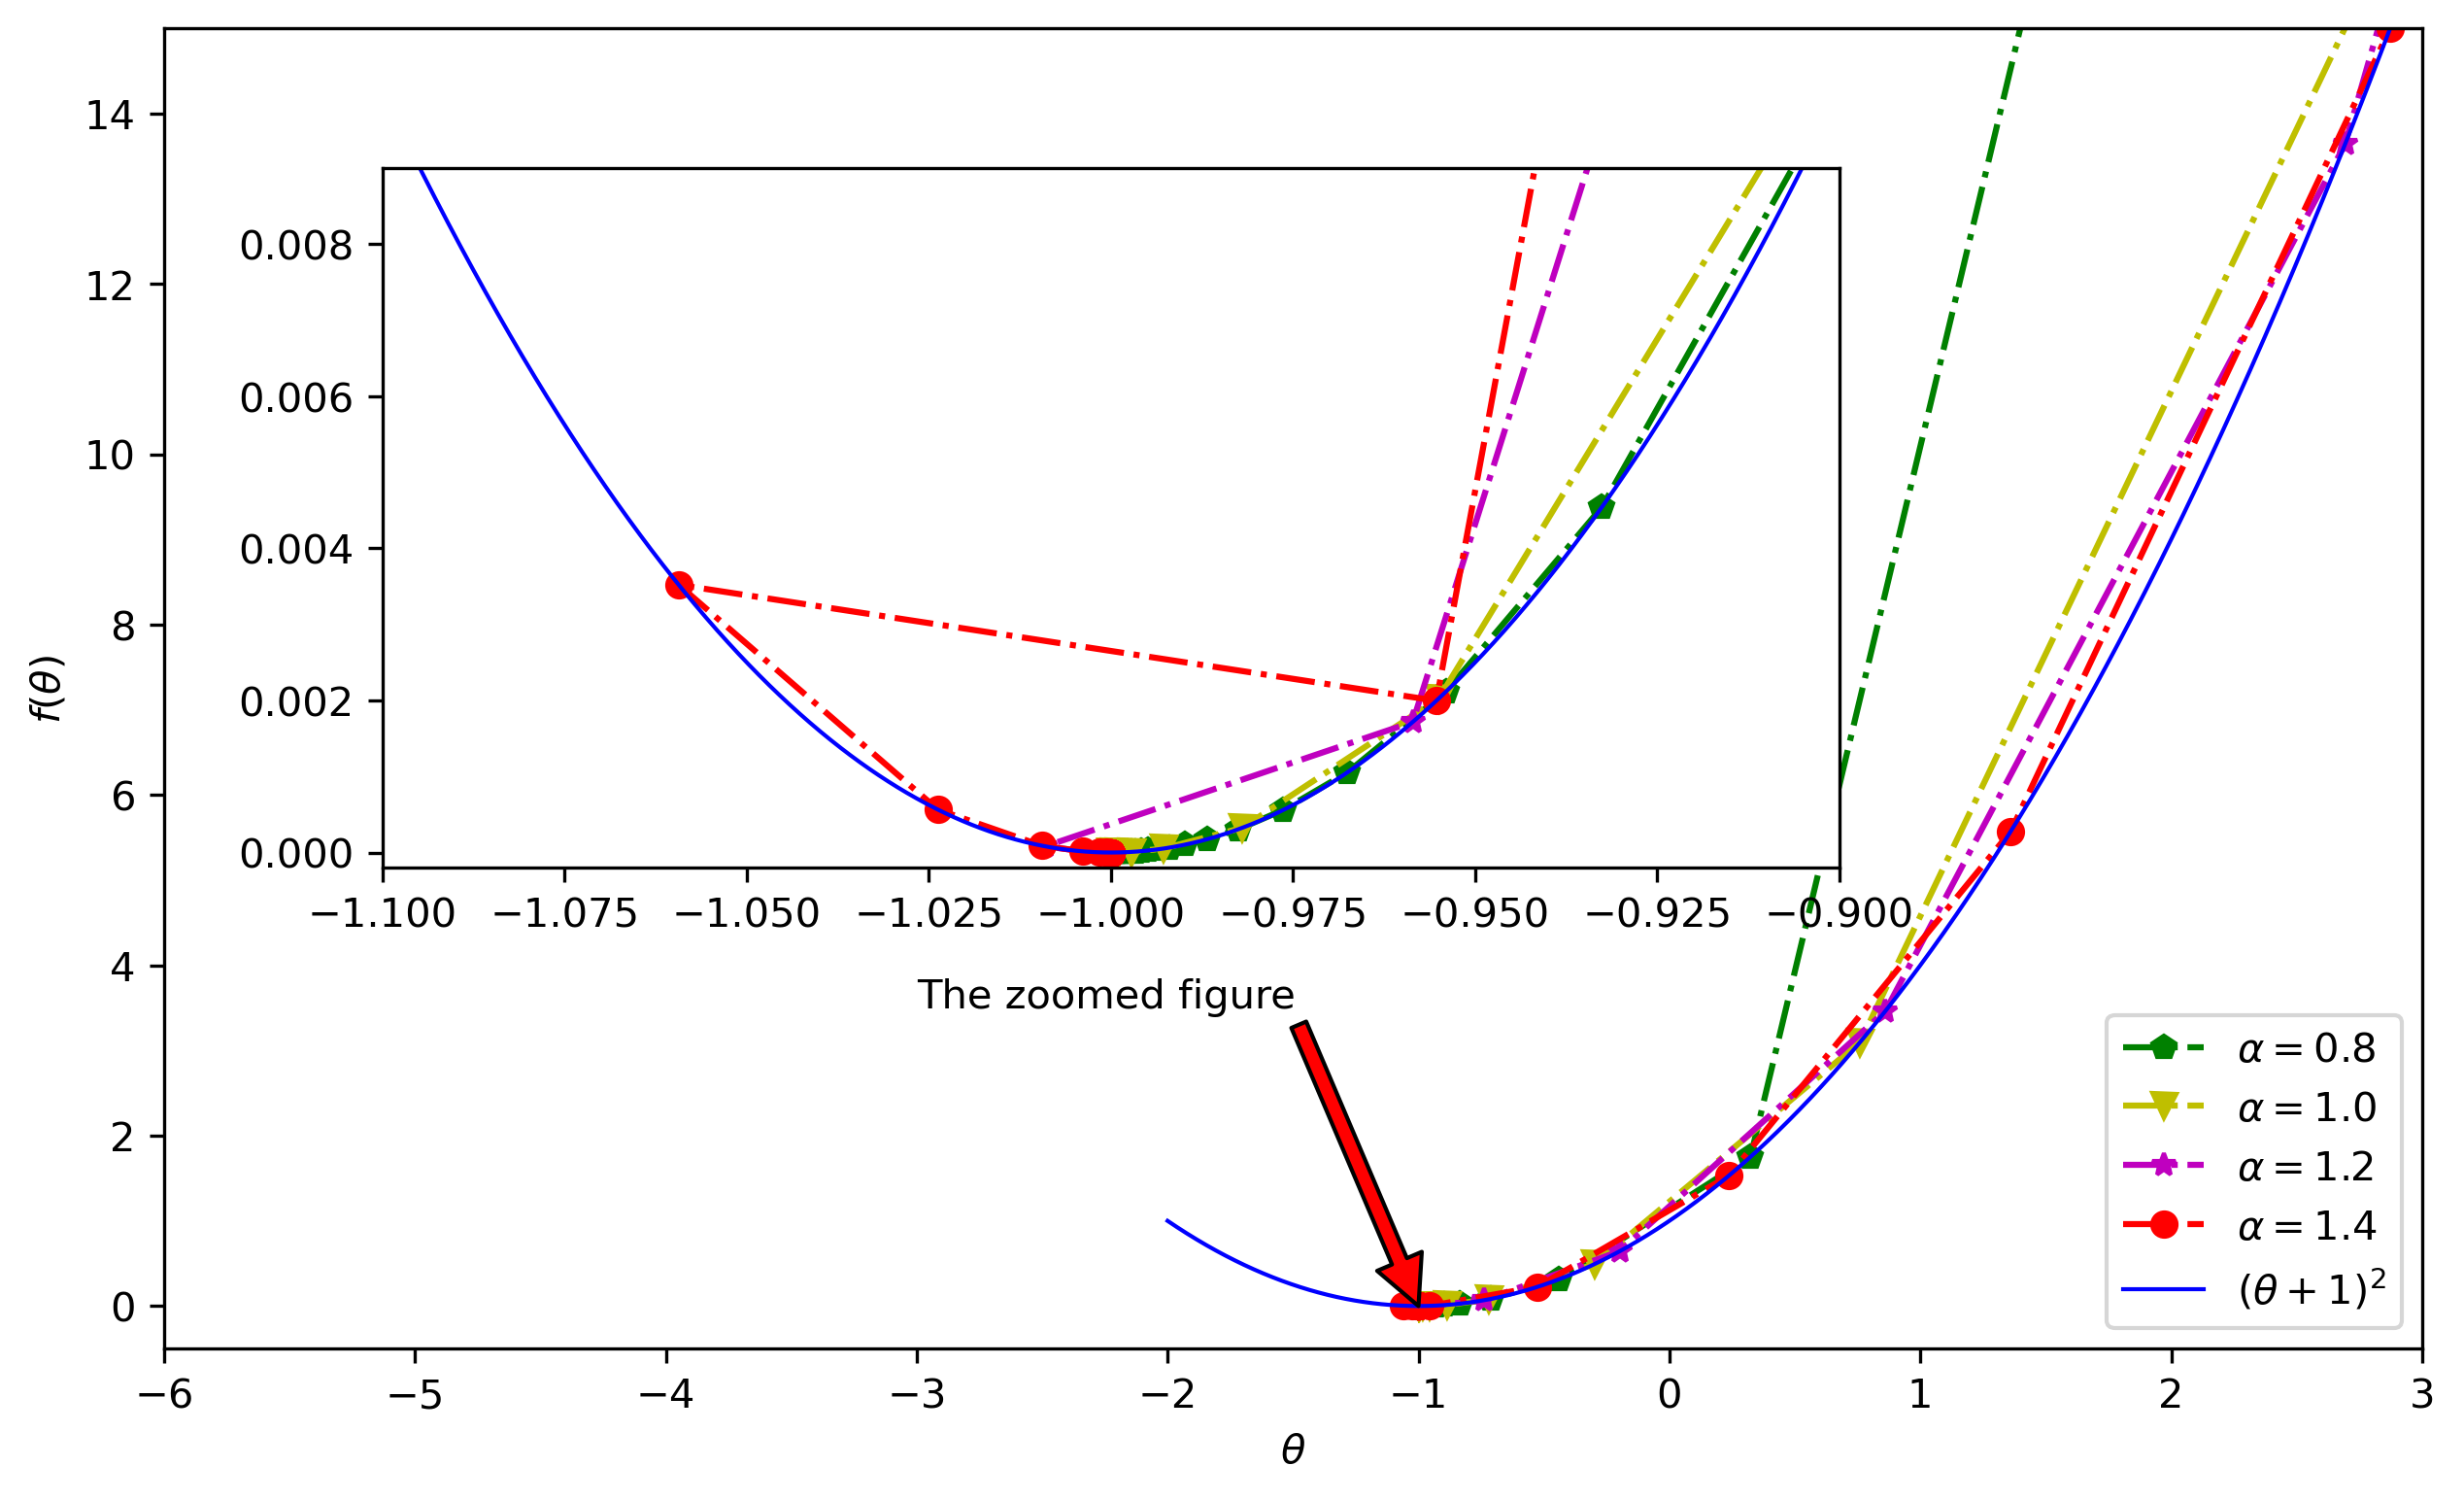

In [149]:
#Fig3,vfosgd_pf
fig = plt.figure(figsize=(10,6),dpi=300)

x=t.arange(-2, 11.1,0.0001)
y=f(x)
dxf=t.tensor(resultf1_2)
dyf=f(dxf)

ax1 = fig.add_subplot(1, 1, 1)
dxf=t.tensor(resultf0_8)
dyf=f(dxf)
ax1.plot(dxf,dyf,'g-.p',label=r'$\alpha  = 0.8$')
dxf=t.tensor(resultf1_0)
dyf=f(dxf)
ax1.plot(dxf,dyf,'y-.v',label=r'$\alpha  = 1.0$')
dxf=t.tensor(resultf1_2)
dyf=f(dxf)
ax1.plot(dxf,dyf,'m-.*',label=r'$\alpha  = 1.2$')
dxf=t.tensor(resultf1_4)
dyf=f(dxf)
ax1.plot(dxf,dyf,'r-.o',label=r'$\alpha  = 1.4$')
ax1.plot(x,y,'-',label=r'${(\theta  + 1)^2}$',color='b',linewidth ='1')
ax1.set_xlim(-6,3)
ax1.set_ylim(-0.5,15)
ax1.legend(loc='lower right')
ax1.set_xlabel(r'$\theta $')
ax1.set_ylabel(r'$f(\theta )$')
ax1.annotate(r'The zoomed figure', xy=(-1,0), xytext=(-3,3.5),arrowprops=dict(facecolor='red'))

left, bottom, width, height = 0.2,0.4,0.5,0.4
ax2 = fig.add_axes([left,bottom,width,height])
dxf=t.tensor(resultf0_8)
dyf=f(dxf)
ax2.plot(dxf,dyf,'g-.p',label=r'$\alpha  = 0.8$')
dxf=t.tensor(resultf1_0)
dyf=f(dxf)
ax2.plot(dxf,dyf,'y-.v',label=r'$\alpha  = 1.0$')
dxf=t.tensor(resultf1_2)
dyf=f(dxf)
ax2.plot(dxf,dyf,'m-.*',label=r'$\alpha  = 1.2$')
dxf=t.tensor(resultf1_4)
dyf=f(dxf)
ax2.plot(dxf,dyf,'r-.o',label=r'$\alpha  = 1.4$')
ax2.plot(x,y,'-',label=r'${(\theta  + 1)^2}$',color='b',linewidth ='1')
ax2.set_xlim(-1.1,-0.9)
ax2.set_ylim(-0.0002,0.009)

plt.savefig('picture/Fig3.eps',bbox_inches='tight',format='eps')
plt.savefig('picture/Fig3.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/Fig3.pdf',bbox_inches='tight',format='pdf')
plt.show()